                                                            FLIGHT PRICE DATASET

OBJECTIVE : THE MAIN GOAL IS TO CLEAN , TRANSFORM & ENGINEER THE DATA TO BE APPROPRIATE FOR TRAINING THE DATASET WITH THE PROPER MACHINE LEARNING ALGORITHMS.

OPERATIONS TO BE PERFORMED :
    
    > FEATURE ENGINEERING 
    > CATEGORICAL ENCODING 
    > EXPLORATORY DATA ANALYSIS & VISUALIZATION

TABLE OF CONTENTS :
    
    1. IMPORTING THE DATASET & EXPLORING IT
    
    2. FEATURE ENGINEERING
        2.1 Date_of_Journey
        2.2 Arrival_Time & Dep_Time
        2.3 Route
        2.4 Duration 
        
    3. CATEGORICAL ENCODING 
        3.1 Label Encoding
        
    4. EXPLORATORY DATA ANALYSIS & VISUALIZATION 
        4.1 ANALYSING THE REVENUE OF DIFFERENT AIRLINES 
        4.2 VISUALIZING THE MOST NUMBER OF FLIGHTS BASED ON SOURCE & DESTINATION 
        
    5. DATA INSIGHTS & CONCLUSION 

                                                        1. IMPORTING THE DATASET & EXPLORING IT.

In [ ]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import opendatasets as od
%matplotlib inline

IMPORTING THE DATASET DIRECTLY FROM KAGGLE USING A API TOKEN

In [ ]:
download_url_1 = 'https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset?search=flight+&select=Data_Train.xlsx'
download_url_2 = 'https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset?search=flight+&select=Test_set.xlsx'

od.download(download_url_1)
od.download(download_url_2)

In [37]:
#Importing the train dataset

df_train = pd.read_excel('flight-price-prediction-dataset/Data_Train.xlsx')
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [38]:
#Importing the test dataset

df_test = pd.read_excel('flight-price-prediction-dataset/Test_set.xlsx')
df_test.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [39]:
#Merging both the datasets

df = df_train.append(df_test)
df.head(3)

/tmp/ipykernel_77/3432934759.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0


In [40]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


                                                           2. FEATURE ENGINEERING 

2.1 Date_of_Journey ( Fixing the datatype & seperating the day , year , month to seperate columns)

In [42]:
#changing the datatype from object to datetime 

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13354 non-null  object        
 1   Date_of_Journey  13354 non-null  datetime64[ns]
 2   Source           13354 non-null  object        
 3   Destination      13354 non-null  object        
 4   Route            13353 non-null  object        
 5   Dep_Time         13354 non-null  object        
 6   Arrival_Time     13354 non-null  object        
 7   Duration         13354 non-null  object        
 8   Total_Stops      13353 non-null  object        
 9   Additional_Info  13354 non-null  object        
 10  Price            10683 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 1.2+ MB


/tmp/ipykernel_77/482212638.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [43]:
#getting 3 seperate columns from the date column

df['year'] = df['Date_of_Journey'].dt.year
df['month'] = df['Date_of_Journey'].dt.month
df['date'] = df['Date_of_Journey'].dt.day

df[['year','month','date']]

,year,month,date
0,2019,3,24
1,2019,1,5
2,2019,9,6
3,2019,12,5
4,2019,1,3
...,...,...,...
2666,2019,6,6
2667,2019,3,27
2668,2019,6,3
2669,2019,6,3


In [44]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,2019,9,6


In [45]:
#drop Date_of_Journey column

df.drop('Date_of_Journey' , axis = 1 , inplace = True)
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24


2.2 Arrival_Time & Dep_Time ( Fixing the Data-type &  seperating the hour and minutes)

In [46]:
df.	Arrival_Time.head(5)

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

WE CAN OBSERVE THAT THE DATA IS NOT UNIFORM .

In [47]:
#Correcting the format of the data .

df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
df.Arrival_Time.head(5)

0    01:10
1    13:15
2    04:25
3    23:30
4    21:35
Name: Arrival_Time, dtype: object

In [48]:
#getting the hours and minutes seperately

df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Min'] = df['Arrival_Time'].str.split(':').str[1]

#converting the datatype to integer

df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Min'] = df['Arrival_Min'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  year             13354 non-null  int64  
 11  month            13354 non-null  int64  
 12  date             13354 non-null  int64  
 13  Arrival_Hour     13354 non-null  int64  
 14  Arrival_Min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [49]:
#Drop the Arrival_Time column

df.drop('Arrival_Time' , axis = 1 , inplace = True)
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,2019,3,24,1,10


In [50]:
#similarly for the departure time

df['Dept_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_Min'] = df['Dep_Time'].str.split(':').str[1]

df['Dept_Hour'] = df['Dept_Hour'].astype(int)
df['Dept_Min'] = df['Dept_Min'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   year             13354 non-null  int64  
 10  month            13354 non-null  int64  
 11  date             13354 non-null  int64  
 12  Arrival_Hour     13354 non-null  int64  
 13  Arrival_Min      13354 non-null  int64  
 14  Dept_Hour        13354 non-null  int64  
 15  Dept_Min         13354 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 1.7+ MB


In [51]:
df.drop('Dep_Time' , axis = 1 , inplace = True)
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,2019,3,24,1,10,22,20


2.3 Route

In [52]:
df.Route.head(10)

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
5                CCU → BLR
6          BLR → BOM → DEL
7          BLR → BOM → DEL
8          BLR → BOM → DEL
9          DEL → BOM → COK
Name: Route, dtype: object

HERE ALSO WE CAN SEE THAT THE DATA IS NOT UNIFORM SO WE NEED TO CORRECT IT .

SOLUTION 1 - SEPERATE THE DATA AS SOURCE , STOP1 , STOP2 , DESTINATIOM > BUT WE WILL BE LEFT WITH LOT OF NULL VALUES AS MANY ROUTE DOESNT HAVE ANY STOPS .

SOLUTION 2 - WE WILL DROP THE ROUTE COLUMN AND KEEP THE SOURCE , DESTINATION & NUMBER OF STOPS COLUMN >> WE WILL LOSE THE DATA REGARDING THE STOP LOCATIONS BUT WE WILL KNOW THE EXACT NUMBER OF STOPS IN THE ROUTE .

In [53]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [54]:
#Replacing the values with proper integer values.

df['Total_Stops'] = df['Total_Stops'].replace({'non-stop' : 0 ,'2 stops' : 2 , '1 stop' : 1 , '3 stops':3 , '4 stops' : 4})

#dropping the route column

df.drop('Route' , axis = 1 , inplace = True )

In [55]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,2019,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,2019,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,2019,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,2019,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,2019,1,3,21,35,16,50


2.4 Duration

WE CAN SEE THAT DURATION IS IN FORM OF OBJECT WHICH IS NOT FIT FOR TRAINING THE DATASET .

SO WE WILL BE CONVERTING THE DURATION COLUMN TO ONLY HOURS FORMAT WITH INTEGER DATATYPE

In [56]:
#Extracting the hour values from the column

df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [57]:
#drop innacuurate records 

df[df['Duration_hour'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,2019,6,3,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,2019,12,3,16,55,16,50,5m


In [58]:
df.drop(6474 , axis = 0 , inplace = True)
df.drop(2660 , axis = 0 , inplace = True)

In [59]:
#Converting the datatype 

df['Duration_hour'] = df['Duration_hour'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   year             13351 non-null  int64  
 8   month            13351 non-null  int64  
 9   date             13351 non-null  int64  
 10  Arrival_Hour     13351 non-null  int64  
 11  Arrival_Min      13351 non-null  int64  
 12  Dept_Hour        13351 non-null  int64  
 13  Dept_Min         13351 non-null  int64  
 14  Duration_hour    13351 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 1.6+ MB


In [60]:
#Converting the hours to minutes 

df['Duration_hour'] = df['Duration_hour'].apply(lambda x : x * 60)
df['Duration_hour']

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: Duration_hour, Length: 13351, dtype: int64

In [61]:
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,2019,3,24,1,10,22,20,120
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,2019,1,5,13,15,5,50,420
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,2019,9,6,4,25,9,25,1140


In [62]:
#Extracting the minute  values from the column

df['Duration_min'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df['Duration_min']

0        50
1        25
2       NaN
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration_min, Length: 13351, dtype: object

In [63]:
#Replacing the empty values with 0.

df['Duration_min']= df['Duration_min'].fillna(0)

In [64]:
#Converting the data-type

df['Duration_min'] = df['Duration_min'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   year             13351 non-null  int64  
 8   month            13351 non-null  int64  
 9   date             13351 non-null  int64  
 10  Arrival_Hour     13351 non-null  int64  
 11  Arrival_Min      13351 non-null  int64  
 12  Dept_Hour        13351 non-null  int64  
 13  Dept_Min         13351 non-null  int64  
 14  Duration_hour    13351 non-null  int64  
 15  Duration_min     13351 non-null  float64
dtypes: float64(3), int64(8), object(5)
memory usage: 1.7+ MB


In [65]:
#Getting the total minutes by adding both the newly obtained columns

df['Duration(Mins)'] = df['Duration_hour'] + df['Duration_min']
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration_hour,Duration_min,Duration(Mins)
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,2019,3,24,1,10,22,20,120,50.0,170.0
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,2019,1,5,13,15,5,50,420,25.0,445.0
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,2019,9,6,4,25,9,25,1140,0.0,1140.0


In [66]:
#Getting the final data in form of hours 

df['Duration(hrs)'] = df['Duration(Mins)'] / 60

In [67]:
#dropping all the unnecessary  columns 

df.drop('Duration' , axis = 1 , inplace = True)
df.drop('Duration_hour' , axis = 1 , inplace = True)
df.drop('Duration_min' , axis = 1  , inplace = True )
df.drop('Duration(Mins)' , axis = 1 , inplace = True)

In [68]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration(hrs)
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,2019,3,24,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,2019,1,5,13,15,5,50,7.416667
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,2019,9,6,4,25,9,25,19.000000


                                                             3. CATEGORICAL ENCODING

3.1 LABEL ENCODING - All the remaining Categorical columns

In [69]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [70]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#creating a final dataset for machine learning processing by encoding all the categorical variables
encoded_df = df.copy()
encoded_df['Airline'] = labelencoder.fit_transform(df['Airline'])
encoded_df['Source'] = labelencoder.fit_transform(df['Source'])
encoded_df['Destination'] = labelencoder.fit_transform(df['Destination'])
encoded_df['Additional_Info'] = labelencoder.fit_transform(df['Additional_Info'])

encoded_df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration(hrs)
0,3,0,5,0.0,8,3897.0,2019,3,24,1,10,22,20,2.833333
1,1,3,0,2.0,8,7662.0,2019,1,5,13,15,5,50,7.416667
2,4,2,1,2.0,8,13882.0,2019,9,6,4,25,9,25,19.000000


NOW THE DATA IS COMPLETED WITH FEATURE ENGINEERING & CATEGORICAL ENCODING AND IS NOW READY FOR TRAINING IT WITH DIFFERENT ALGORITHMS .

                                                   4. EXPLORATORY DATA ANALYSIS & VISUALIZATION .

In [71]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration(hrs)
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,2019,3,24,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,2019,1,5,13,15,5,50,7.416667
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,2019,9,6,4,25,9,25,19.000000


4.1 ANALYSING THE REVENUE OF DIFFERENT AIRLINES .

In [72]:
(df.Price.isnull().sum()/len(df.Price))*100

19.99850198487005

In [73]:
#top 5 airline with most revenue

revenue = df.groupby('Airline')['Price'].sum().sort_values(ascending = False)[:5]
revenue

Airline
Jet Airways          44804169.0
Air India            16821514.0
Multiple carriers    13039603.0
IndiGo               11648071.0
Vistara               3734451.0
Name: Price, dtype: float64

VISUALIZING THE ABOVE DATA .

Text(0.5, 1.0, 'Top 5 Airlines with highest revenue')

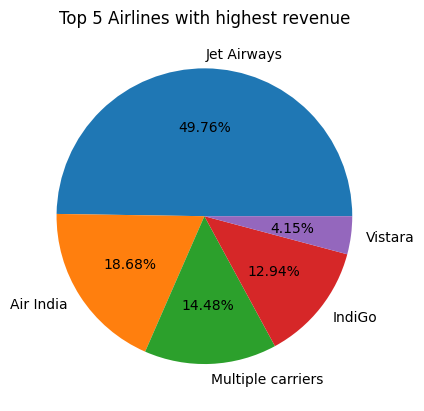

In [74]:
plt.pie(revenue, labels = revenue.index , autopct = '%1.2f%%')
plt.title('Top 5 Airlines with highest revenue')

4.2 VISUALIZING THE MOST NUMBER OF FLIGHTS BASED ON SOURCE & DESTINATION .

<Axes: title={'center': 'Number of Flights based on Source'}>

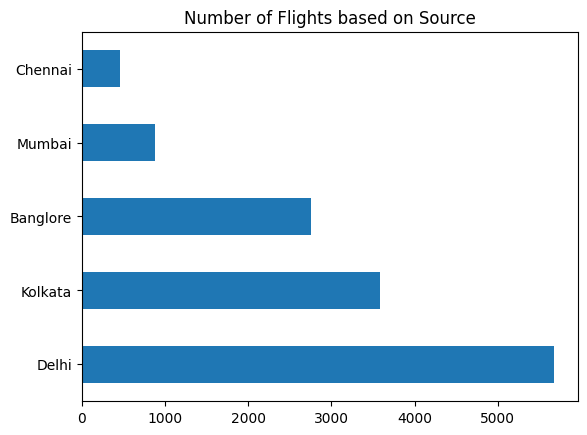

In [75]:
df.Source.value_counts().plot(kind = 'barh' , title = 'Number of Flights based on Source')

<Axes: title={'center': 'Number of flights based on destination'}>

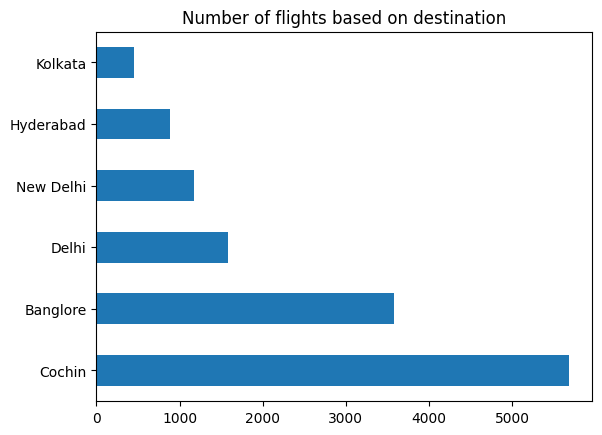

In [76]:
df.Destination.value_counts().plot(kind = 'barh' , title = 'Number of flights based on destination')

In [77]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,date,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration(hrs)
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,2019,3,24,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,2019,1,5,13,15,5,50,7.416667
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,2019,9,6,4,25,9,25,19.000000


                                                        5. DATA INSIGHTS & CONCLUSION 

-> THERE IS NO DATA OF FLIGHTS DEPARTURE FROM COCHIN & HYDERABAD

-> JET AIRWAYS HAS THE MAJORITY MARKET SHARE HAVING APPROXIMATELY 50% SHARE 

-> THE DATASET IS COMPLETELY TRANSFORMED BY DOING VARIOUS OPERATIONS WHICH IS NOW APPROPRIATE TO CARRY ON MACHINE LEARNING BY SELECTING THE NECESSARY FEATURES 